# CE-40717: Machine Learning

## HW6-Gradient Boosting

### Installation:
You can use [sklearn](https://scikit-learn.org) and [xgboost](https://xgboost.readthedocs.io) packages:
```python
!pip install -U scikit-learn
!pip install xgboost
```

In [2]:
!pip install xgboost

In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\lib\site-packages (0.24.2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from time import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix, confusion_matrix

### Load & Prepare Dataset:

In [2]:
np.random.seed(seed=42)

# load dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target


# preprocess(if you need):


# split dataset to train set and validation set:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

data_train = xgb.DMatrix(data=x_train, label=y_train)
data_val = xgb.DMatrix(data=x_val, label=y_val)

n_val = x_val.shape[0]
class_names = iris.target_names
print(n_val, class_names)

15 ['setosa' 'versicolor' 'virginica']


In [59]:
x_train[0].dtype

dtype('float64')

### Set Hyperparameter for Both Gradine Boost & XGboost:

In [3]:
# Gradine Boost:
GB_param = dict(n_estimators=5,
                learning_rate=0.01,
                max_depth=3,
                random_state=0)

# XGboost:
XGboost_param = {"eta": 0.3,
                 "silent": True,
                 "objective": "multi:softprob",
                 "num_class": 3,
                 "max_depth": 3}

num_round = 5

### Define Classifiers:

In [4]:
# define classifier for gradient boost:
GB_clf = GradientBoostingClassifier(n_estimators=5,
                learning_rate=0.01,
                max_depth=3,
                random_state=0)

# define classifier for XGboost:
XGboost_clf = xgb.XGBClassifier(XGboost_param)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\core.py:430: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


### Train Both Classifiers:

In [5]:
# train  gradient boost:
tic = time()
trained_GB = GB_clf.fit(x_train,  y_train)
toc = time()

# calculate training time for GB:
GB_train_time = toc - tic
print(f"GB_train_time: {1000.0*GB_train_time} millisecond")


# train XGboost:
tic = time()
trained_XGboost = XGboost_clf.fit(x_train,  y_train)
toc = time()

# calculate training time for XGboost:
XGboost_train_time = toc - tic
print(f"XGboost_train_time: {1000.0*XGboost_train_time} millisecond")

GB_train_time: 27.570247650146484 millisecond


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost_train_time: 876.1491775512695 millisecond


### Prediction on Validation Set:

In [6]:
# prediction for gradient boost:
tic = time()
y_pred_GB = GB_clf.predict(x_val)
toc = time()

# calculate validation time per data for GB:
GB_val_time_per_data = toc - tic
print(f"GB_val_time_per_data: {1000.0*GB_val_time_per_data} millisecond")


# prediction for XGboost:
tic = time()
y_pred_XGboost = XGboost_clf.predict(x_val)
toc = time()
# y_pred_XGboost = XGboost_clf.predict_proba(x_val)

# calculate validation time per data for XGboost:
XGboost_val_time_per_data = toc - tic
print(f"XGboost_val_time_per_data: {1000.0*XGboost_val_time_per_data} millisecond")

GB_val_time_per_data: 0.7333755493164062 millisecond
XGboost_val_time_per_data: 6.197929382324219 millisecond


In [7]:
y_pred_XGboost_proba = XGboost_clf.predict_proba(x_val)

### Evaluation (precision - recall - F1 score - confusion matrix):

#### for Gradient Boost:

In [8]:
# calculate precision
precision_GB = precision_score(y_pred_GB, y_val, average='weighted')

print(f"precision_GB: {precision_GB}")

precision_GB: 1.0


In [20]:
# calculate recall
recall_GB = recall_score(y_pred_GB, y_val, average='weighted')

print(f"recall_GB: {recall_GB}")

recall_GB: 1.0


In [21]:
# calculate F1 score
f1_GB = f1_score(y_pred_GB, y_val, average='weighted')

print(f"F1_GB: {f1_GB}")

F1_GB: 1.0


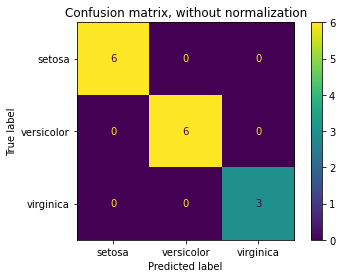

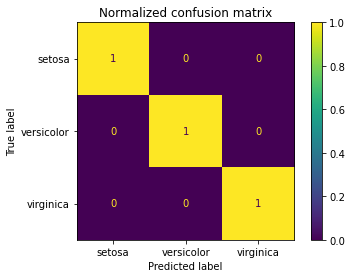

In [9]:
# calculate confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(GB_clf, x_val,y_val, display_labels=class_names, normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### for XGboost:

In [25]:
# calculate precision
precision_XGboost = precision_score(y_pred_XGboost, y_val, average='weighted')

print(f"precision_XGboost: {precision_XGboost}")

precision_XGboost: 1.0


In [28]:
# calculate recall
recall_XGboost = recall_score(y_pred_XGboost, y_val, average='weighted')

print(f"recall_XGboost: {recall_XGboost}")

recall_XGboost: 1.0


In [29]:
# calculate F1 score
f1_XGboost = f1_score(y_pred_XGboost, y_val, average='weighted')

print(f"F1_XGboost: {f1_XGboost}")

F1_XGboost: 1.0


In [32]:
# calculate confusion matrix
cm_XGboost = confusion_matrix(y_pred_XGboost, y_val)

print(f"conf_mat_XGboost: {cm_XGboost}")

conf_mat_XGboost: [[6 0 0]
 [0 6 0]
 [0 0 3]]


### Compare Gradient Boost & XGboost Algorithm According to Evaluation Part Results:

Write your analysis here:

XGBoost uses the 2nd order derivative as an approximation and since it uses a more regularized model formalization to control over-fitting, it has better performance. but here the time it took to train XGboost was longer than gradient boost. but they were both good when it comes to evaluating them on validation data. the scores were all 1 n the validation part and they both were good.
